# Heart Disease Project

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

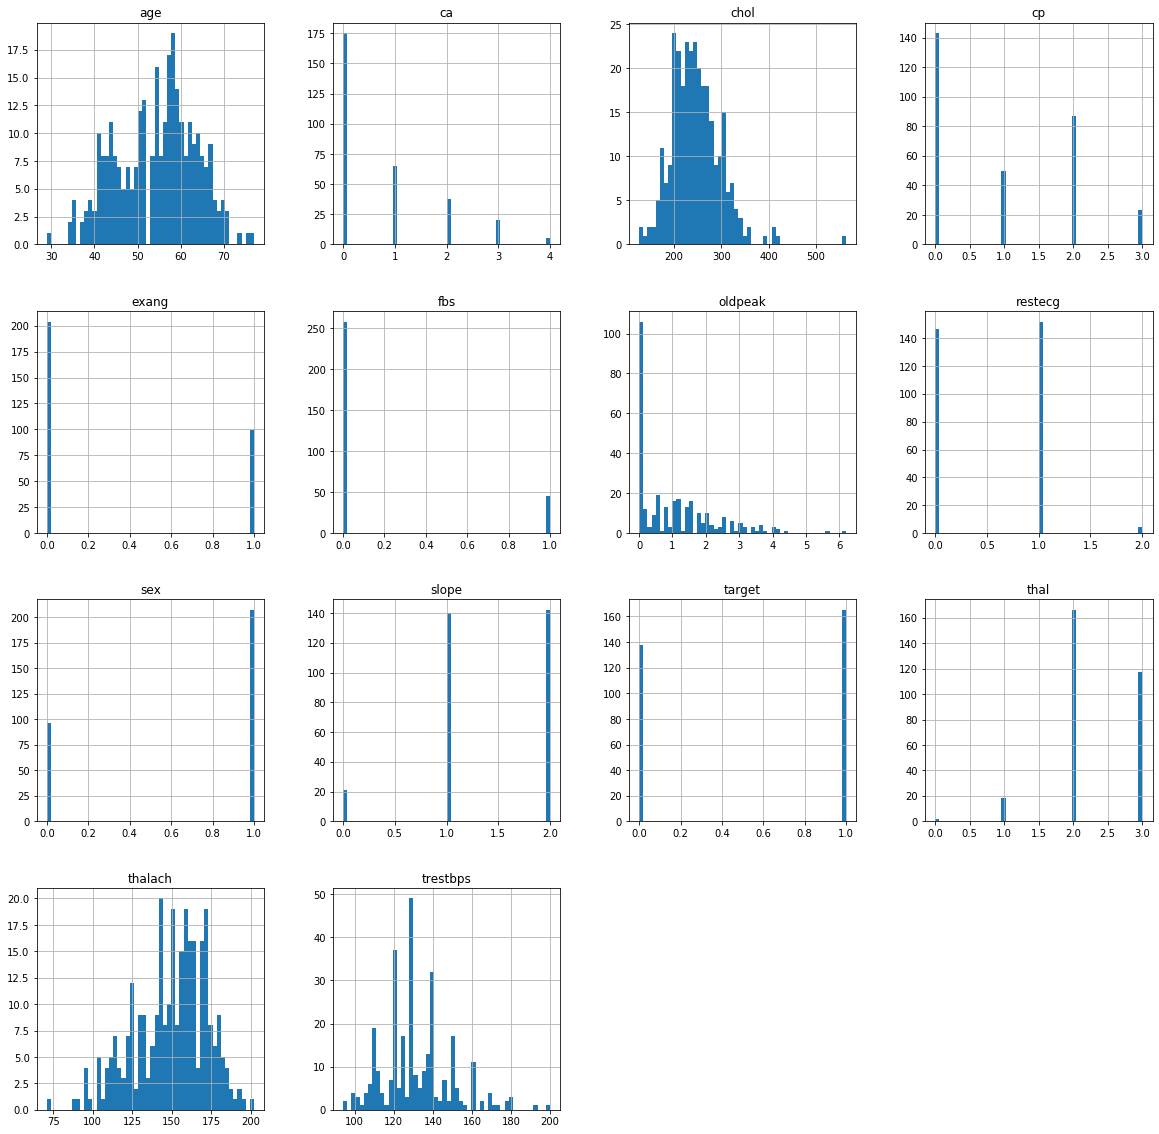

In [8]:
df.hist(bins=50, figsize = (20,20))
plt.show()

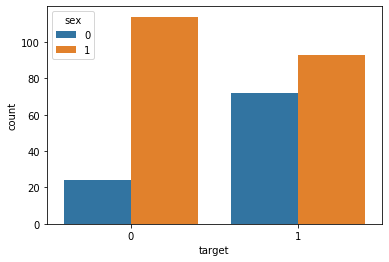

In [9]:
sns.countplot(x = 'target', hue = 'sex', data = df)

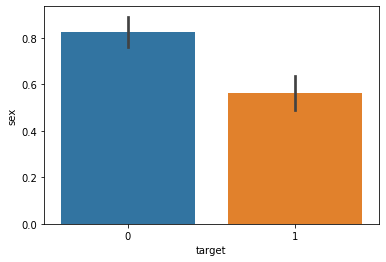

In [10]:
sns.barplot(x = 'target', y = 'sex' , data = df  )

In [11]:
x = df.drop('target' , axis = 1)

In [12]:
y = df['target']

In [13]:
x.shape

(303, 13)

In [14]:
y.shape

(303,)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (242, 13)
Shape of y_train =  (242,)
Shape of X_test =  (61, 13)
Shape of y_test =  (61,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(x_train)
x_train= ms.transform(x_train)
x_test= ms.transform(x_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [18]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [19]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8360655737704918


Cross_Val_Score =  0.6535483870967742


roc_auc_score =  0.8372844827586207


classification_report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



[[25  4]
 [ 6 26]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
 

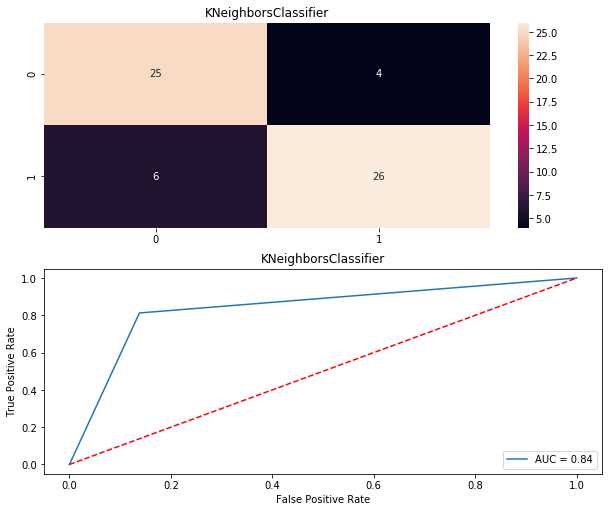

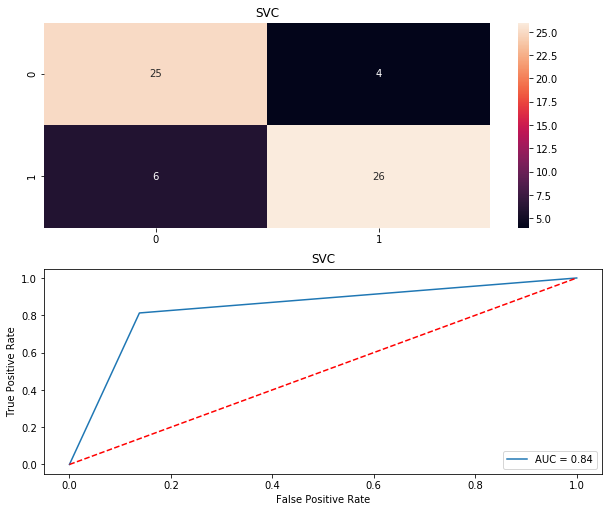

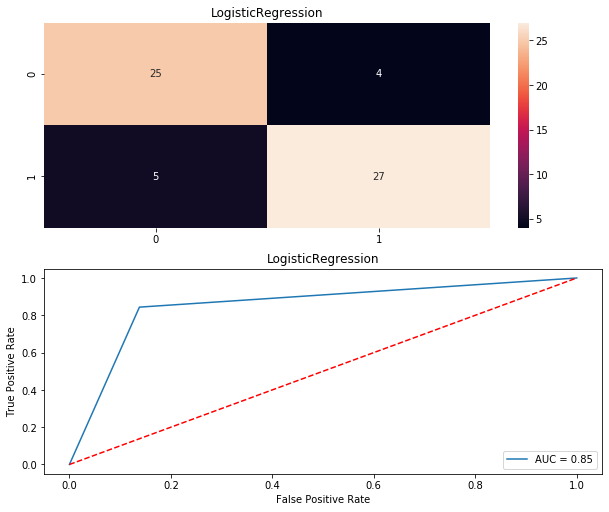

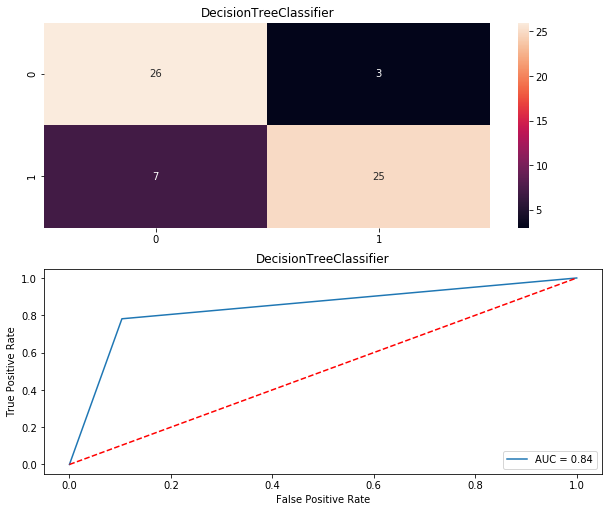

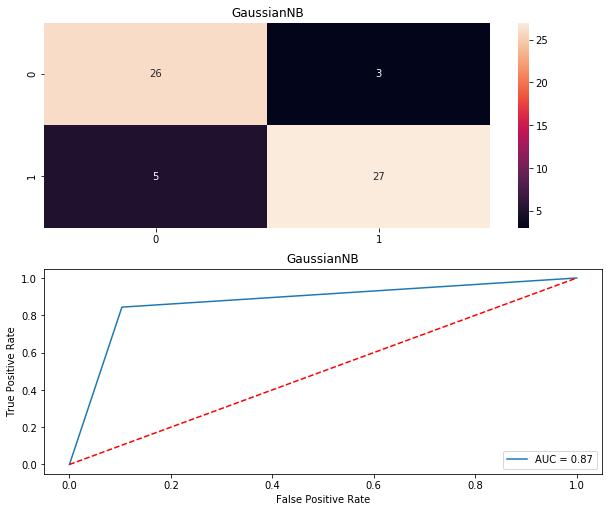

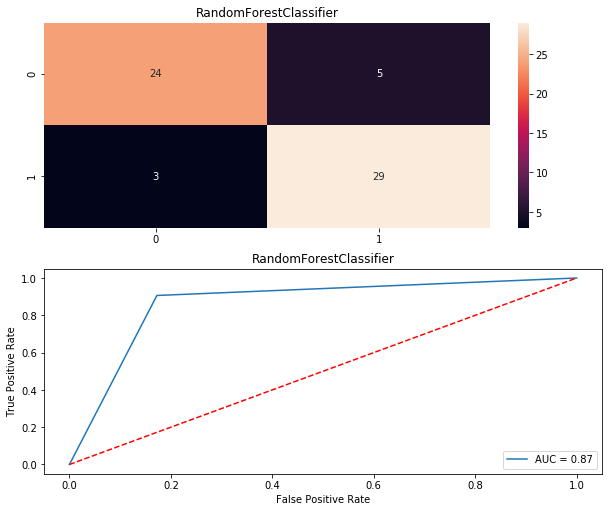

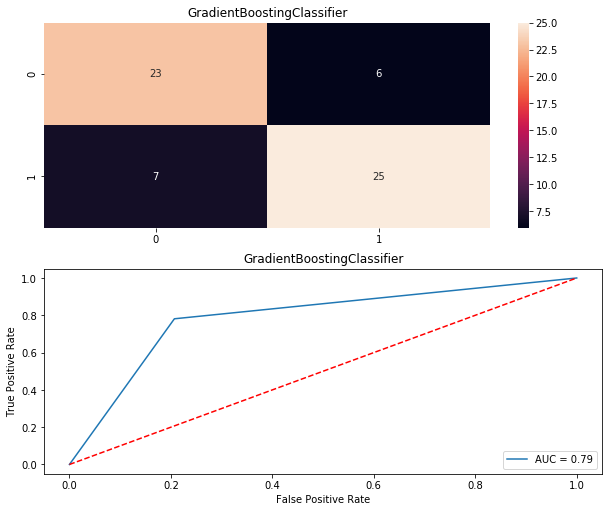

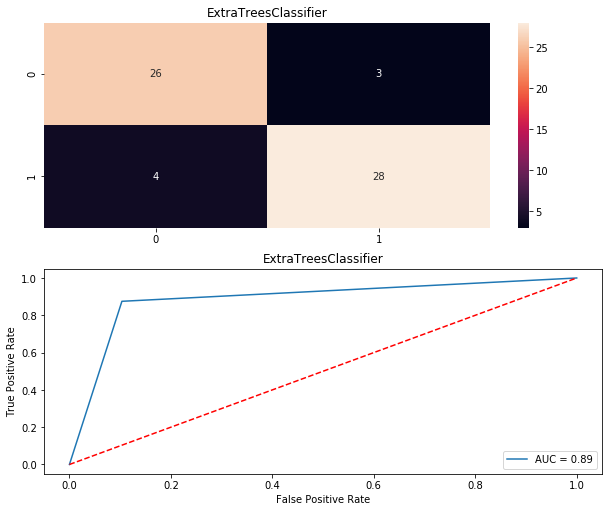

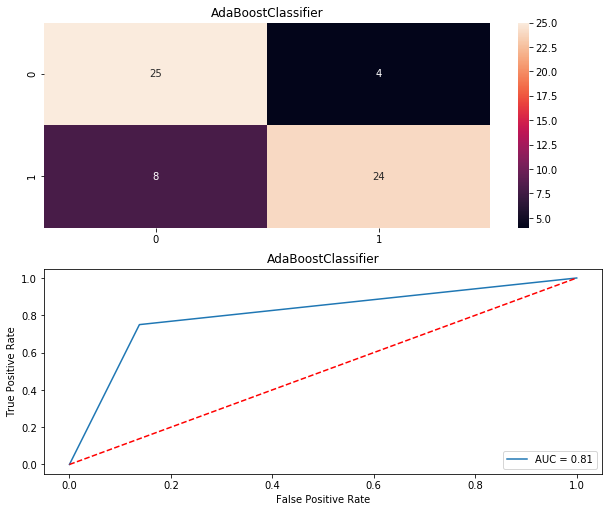

In [21]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [22]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

                        Model  Accuracy_score  Cross_val_score  Roc_auc_curve
6  GradientBoostingClassifier       78.688525        80.150538      78.717672
8          AdaBoostClassifier       80.327869        81.129032      80.603448
0        KNeighborsClassifier       83.606557        65.354839      83.728448
1                         SVC       83.606557        66.043011      83.728448
3      DecisionTreeClassifier       83.606557        76.172043      83.890086
2          LogisticRegression       85.245902        82.838710      85.290948
4                  GaussianNB       86.885246        80.505376      87.015086
5      RandomForestClassifier       86.885246        82.150538      86.691810
7        ExtraTreesClassifier       88.524590        83.795699      88.577586


In [23]:
from sklearn.externals import joblib

In [24]:
# From the above trials we have selected the ExtraTreesClassifier as our final model
joblib.dump(ETC, 'model_heart_disease.csv')

['model_heart_disease.csv']

In [25]:
Model=joblib.load('model_heart_disease.csv')

In [26]:
Model.predict(x_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
check = np.array(y_test)

In [28]:
check

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)